# Lending Case Study
----
### Objective:
#### The goal of this analysis is to find the driving factors behind the loan default for the company. The company then can use these factors to determine the risk foctors in any loan application.

In [1]:
# module imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

#### We are Loading Data into data frame for analysis

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)

#### Basic dataframe analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.shape

(39717, 111)

## Data cleaning

In [5]:
df_null_percent = round(df.isnull().sum()/len(df.index)*100).to_frame()
df_null_percent[0].sort_values(ascending=False)

total_il_high_credit_limit        100.0
mo_sin_old_rev_tl_op              100.0
bc_util                           100.0
bc_open_to_buy                    100.0
avg_cur_bal                       100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0
total_bc_limit                    100.0
dti_joint                         100.0


#### As there are many columns with NULL values, we are following the rule of removing all columns with 90% and above null values in it

In [6]:
# Drop the columns which have 90% or more missing values
minimum_rows = int(len(df.index)*.90)
df = df.dropna(axis=1,thresh=minimum_rows)
df.shape

(39717, 53)

In [7]:
df_null_percent = round(df.isnull().sum()/len(df.index)*100).to_frame()
df_null_percent[0].sort_values(ascending=False)

emp_title                     6.0
emp_length                    3.0
pub_rec_bankruptcies          2.0
verification_status           0.0
delinq_2yrs                   0.0
dti                           0.0
addr_state                    0.0
zip_code                      0.0
title                         0.0
purpose                       0.0
url                           0.0
pymnt_plan                    0.0
loan_status                   0.0
issue_d                       0.0
tax_liens                     0.0
annual_inc                    0.0
earliest_cr_line              0.0
sub_grade                     0.0
grade                         0.0
installment                   0.0
int_rate                      0.0
term                          0.0
funded_amnt_inv               0.0
funded_amnt                   0.0
loan_amnt                     0.0
member_id                     0.0
home_ownership                0.0
inq_last_6mths                0.0
open_acc                      0.0
recoveries    

## Variables selection for the analysis

#### We have removed many variables with no usefull data, but still the remaining variable make up a huge sum. So in order to narrow down the field of study, we are going to implement the following rule:

#### As this analysis results are going to be used to analyse the risk involved in a loan application, we are going to only focus on:
> 1. Loan Characterstics
> 2. Applicant characterstics.

#### We are going to ignore, any variable which points to applicants behaviour after loan has sanctioned, as during initial analysis these data will not be available

#### So out all the column remaing the following columns were chosen:
|Column Name|Characterstics|
| :-------------: | :----------: |
|emp_length|Applicant|
|verification_status|Applicant|
|dti|Applicant|
|purpose|Applicant|
|loan_status|Loan|
|issue_d|Loan|
|annual_inc|Applicant|
|sub_grade|Applicant|
|grade|Applicant|
|int_rate|Loan|
|term|Loan|
|funded_amnt|Loan|
|loan_amnt|Loan|
|home_ownership|Applicant|
|open_acc|Applicant|
|application_type|Loan|

#### Note: member_id and id are not selected, as they don't exhibit any the required characterstics
#### application_type is not selected due to all data related to Individual type


In [8]:
# Selected Columns
selected_columns = [
                    # Applicant Characterstics Variable
                    'emp_length', 'verification_status','dti','annual_inc',
                    'sub_grade','grade', 'purpose','home_ownership','open_acc',
                    # Loan Characterstics Variable
                    'loan_status','issue_d','int_rate','term','funded_amnt','loan_amnt',
                    ]

In [9]:
# remove all other non required columns
df = df.loc[:,selected_columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emp_length           38642 non-null  object 
 1   verification_status  39717 non-null  object 
 2   dti                  39717 non-null  float64
 3   annual_inc           39717 non-null  float64
 4   sub_grade            39717 non-null  object 
 5   grade                39717 non-null  object 
 6   purpose              39717 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   open_acc             39717 non-null  int64  
 9   loan_status          39717 non-null  object 
 10  issue_d              39717 non-null  object 
 11  int_rate             39717 non-null  object 
 12  term                 39717 non-null  object 
 13  funded_amnt          39717 non-null  int64  
 14  loan_amnt            39717 non-null  int64  
dtypes: float64(2), int64(3), object(10)


In [11]:
df.shape

(39717, 15)

In [12]:
df_null_percent = round(df.isna().sum()/len(df.index)*100).to_frame()
df_null_percent[0].sort_values(ascending=False)

emp_length             3.0
loan_amnt              0.0
funded_amnt            0.0
term                   0.0
int_rate               0.0
issue_d                0.0
loan_status            0.0
open_acc               0.0
home_ownership         0.0
purpose                0.0
grade                  0.0
sub_grade              0.0
annual_inc             0.0
dti                    0.0
verification_status    0.0
Name: 0, dtype: float64

#### For emp_length, we are filling NA values with mode of the column

In [13]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [14]:
df_null_percent = round(df.isna().sum()/len(df.index)*100).to_frame()
df_null_percent[0].sort_values(ascending=False)

loan_amnt              0.0
funded_amnt            0.0
term                   0.0
int_rate               0.0
issue_d                0.0
loan_status            0.0
open_acc               0.0
home_ownership         0.0
purpose                0.0
grade                  0.0
sub_grade              0.0
annual_inc             0.0
dti                    0.0
verification_status    0.0
emp_length             0.0
Name: 0, dtype: float64

### Sanity Check

#### As we are only analysing the factors leading to loan default, we do not need any data regarding Current Loan Type 

In [15]:
df = df[df['loan_status'] != 'Current']

### Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emp_length           38577 non-null  object 
 1   verification_status  38577 non-null  object 
 2   dti                  38577 non-null  float64
 3   annual_inc           38577 non-null  float64
 4   sub_grade            38577 non-null  object 
 5   grade                38577 non-null  object 
 6   purpose              38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   open_acc             38577 non-null  int64  
 9   loan_status          38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  int_rate             38577 non-null  object 
 12  term                 38577 non-null  object 
 13  funded_amnt          38577 non-null  int64  
 14  loan_amnt            38577 non-null  int64  
dtypes: float64(2), int64(3), object(10)


In [51]:
# Define the target variable
# we are conducting analysis about Loan default rate
df['Default_rate'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emp_length           38577 non-null  object 
 1   verification_status  38577 non-null  object 
 2   dti                  38577 non-null  float64
 3   annual_inc           38577 non-null  float64
 4   sub_grade            38577 non-null  object 
 5   grade                38577 non-null  object 
 6   purpose              38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   open_acc             38577 non-null  int64  
 9   loan_status          38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  int_rate             38577 non-null  object 
 12  term                 38577 non-null  object 
 13  funded_amnt          38577 non-null  int64  
 14  loan_amnt            38577 non-null  int64  
 15  Default_rate         38577 non-null 

In [20]:
# Employment Lenght into int datatype for easier analysis
def convert_emp_length_nominal(x):
    if x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    else:
        return int(x[0])

df.loc[:,['emp_length']] = df['emp_length'].apply(convert_emp_length_nominal)

In [42]:
# Converting the column data to datetime columns
df.loc[:,'issue_d'] = df['issue_d'].apply(lambda x: pd.to_datetime(x,format='%b-%y', errors='ignore'))

In [49]:
# creating new variable of issued month and year
df['issue_month'] = df['issue_d'].dt.month_name()
df['issue_year'] = pd.DatetimeIndex(df['issue_d']).year

In [80]:
# interest rate to be converted to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))

In [122]:
bins = [5, 10, 15, 20,np.inf]
names = ['5-10', '10-15', '15-20', '20+']

df['int_rate_cat'] = pd.cut(df['int_rate'], bins, labels=names)

In [158]:
bins = [5000, 15000,30000,np.inf]
names = ['Small', 'Medium', 'Large']

df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], bins, labels=names)

#### Bucketing the annual income according to US Standards
> 1. Less than 48500 then LIG
> 2. Between 48500 and 145500 then MIG
> 3. Higher than 144500 then HIG

<a href="https://www.pewresearch.org/fact-tank/2020/07/23/are-you-in-the-american-middle-class/#:~:text=In%202018%2C%20the%20national%20middle,(incomes%20in%202018%20dollars)."> Link to the classification</a>

In [89]:
def income_range(x):
    if x <= 48500:
        return 'LOW'
    elif x > 48500 and x <= 145500:
        return 'MID'
    else:
        return 'HIG'

df['income_cat'] = df['annual_inc'].apply(income_range)

In [100]:
# lot of unique values in dti that are close to each other, so we are rounding off to identify the patterns easily.
df['dti'] = df['dti'].apply(lambda x: round(x,0))

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   emp_length           38577 non-null  int64         
 1   verification_status  38577 non-null  object        
 2   dti                  38577 non-null  float64       
 3   annual_inc           38577 non-null  float64       
 4   sub_grade            38577 non-null  object        
 5   grade                38577 non-null  object        
 6   purpose              38577 non-null  object        
 7   home_ownership       38577 non-null  object        
 8   issue_d              38577 non-null  datetime64[ns]
 9   int_rate             38577 non-null  float64       
 10  term                 38577 non-null  object        
 11  funded_amnt          38577 non-null  int64         
 12  loan_amnt            38577 non-null  int64         
 13  Default_rate         38577 non-

### Ploting Functions
#### Param: Column name
#### Returns reggression plot if the column type is object other wise it plots barplot

In [98]:
def Univariate_analysis(coulumn):
    data_df = df.groupby([coulumn],as_index=False)['Default_rate'].mean()
    plt.figure(figsize=(15,8))
    if df.dtypes[coulumn] != 'object':
        sns.regplot(x=coulumn, y="Default_rate", data=data_df)
    else:
        g = sns.barplot(x=coulumn, y="Default_rate", data=data_df)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

In [160]:
df.describe()

,emp_length,dti,annual_inc,int_rate,funded_amnt,loan_amnt,Default_rate,issue_year
count,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,5.076445,13.273220,6.877797e+04,11.932219,10784.058506,11047.025430,0.145864,2010.309070
std,3.602917,6.684078,6.421868e+04,3.691327,7090.306027,7348.441646,0.352975,0.882658
min,0.000000,0.000000,4.000000e+03,5.420000,500.000000,500.000000,0.000000,2007.000000
25%,2.000000,8.000000,4.000000e+04,8.940000,5200.000000,5300.000000,0.000000,2010.000000
50%,4.000000,13.000000,5.886800e+04,11.710000,9550.000000,9600.000000,0.000000,2011.000000
75%,9.000000,19.000000,8.200000e+04,14.380000,15000.000000,15000.000000,0.000000,2011.000000
max,10.000000,30.000000,6.000000e+06,24.400000,35000.000000,35000.000000,1.000000,2011.000000


In [85]:
df = df.drop(columns=['loan_status'])

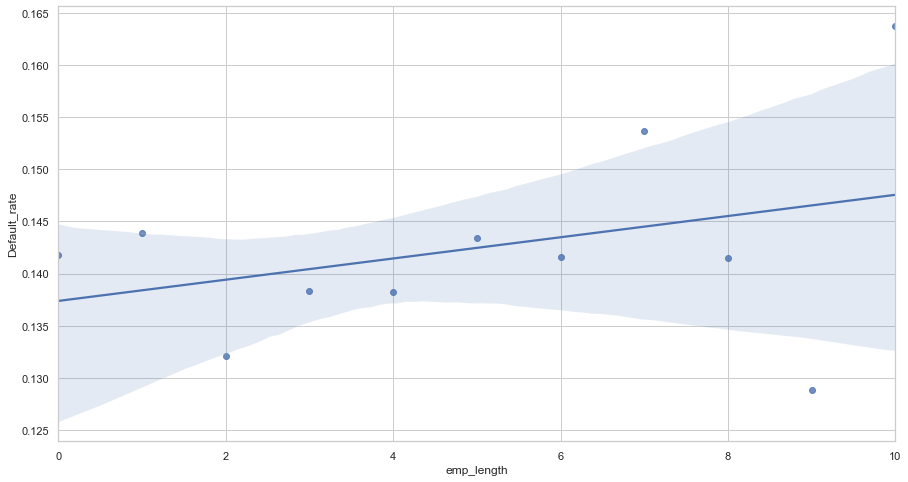

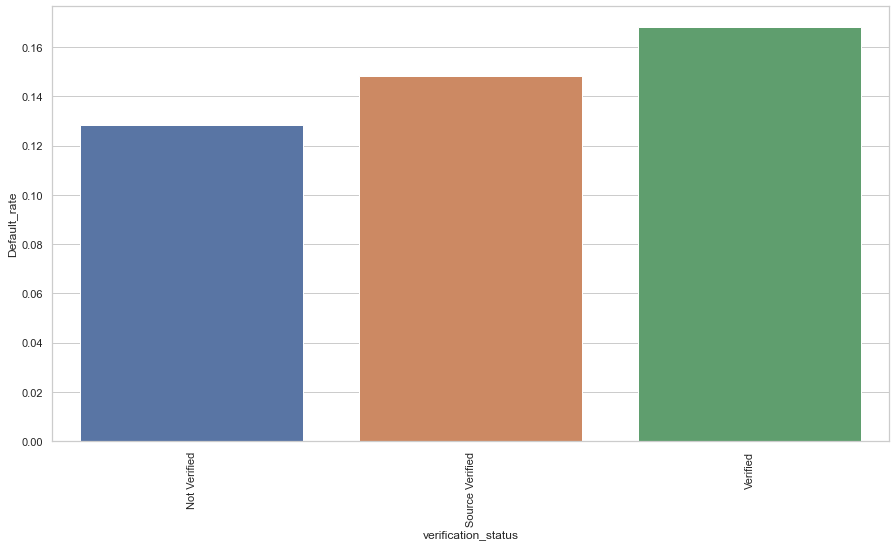

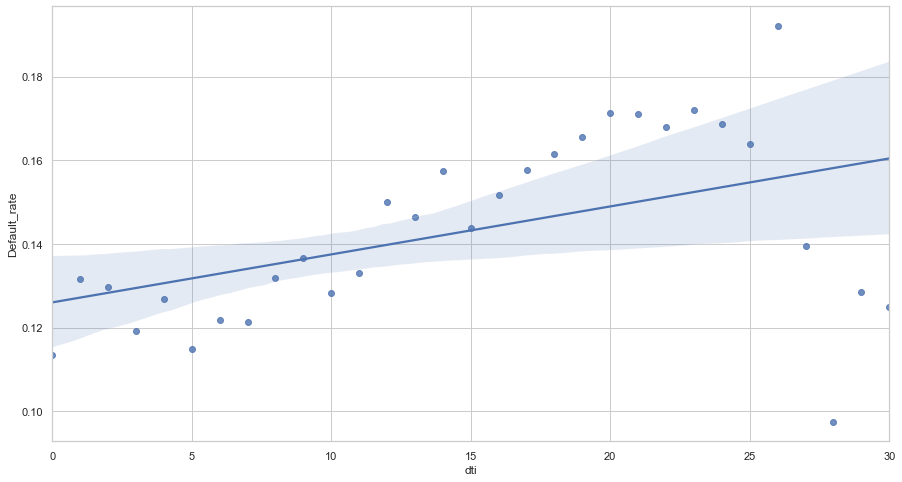

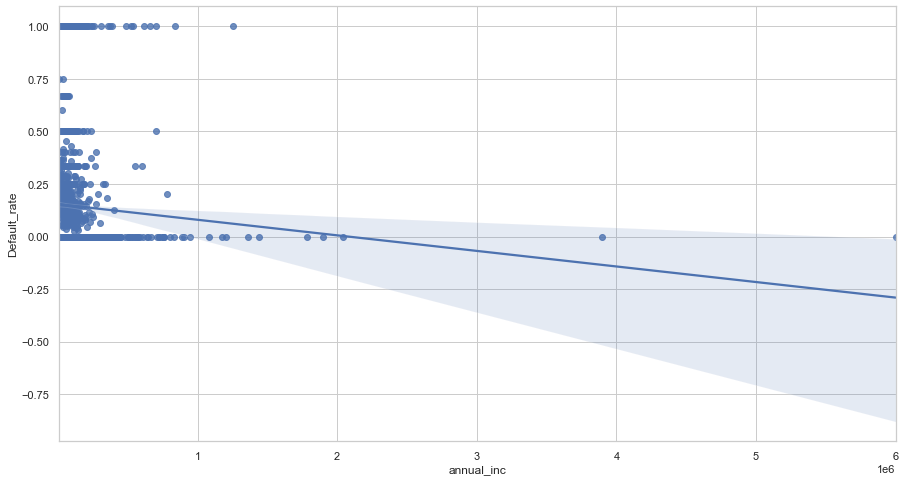

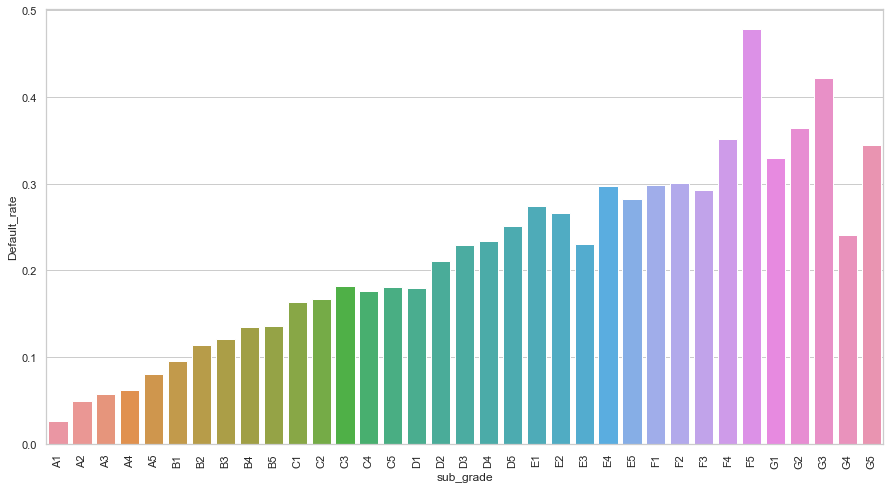

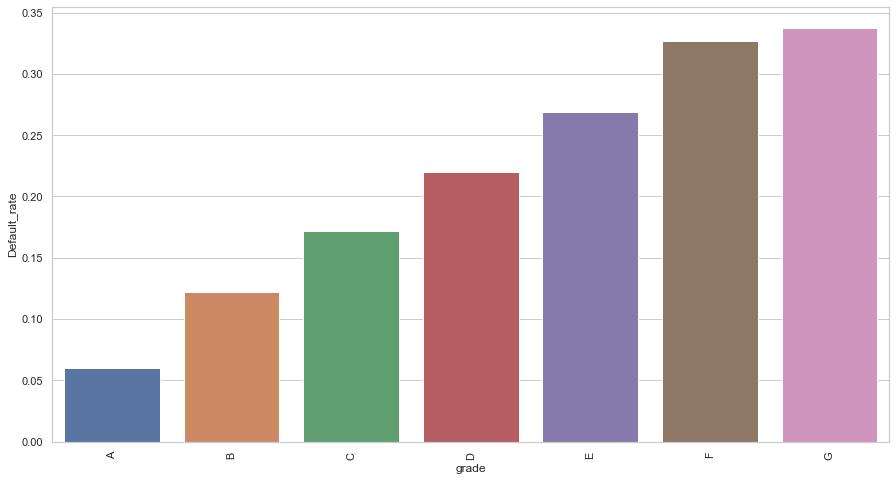

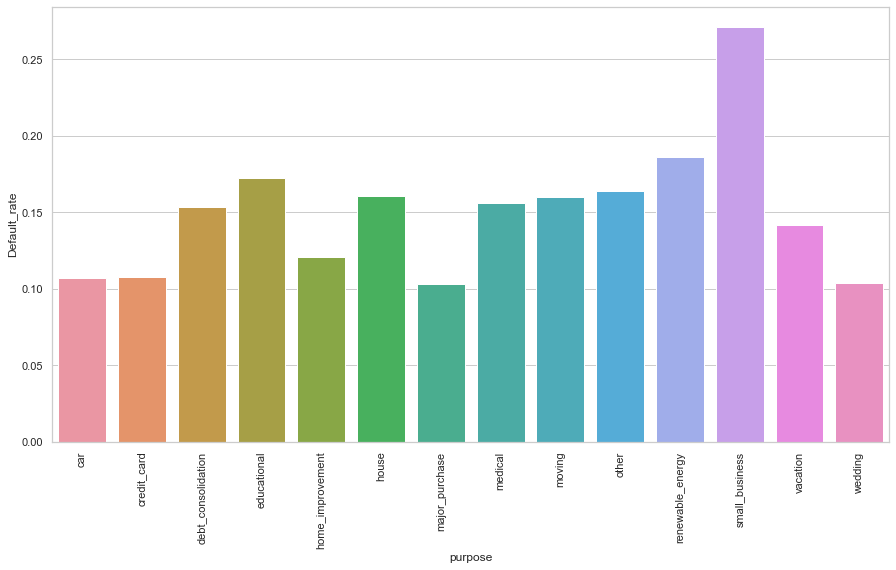

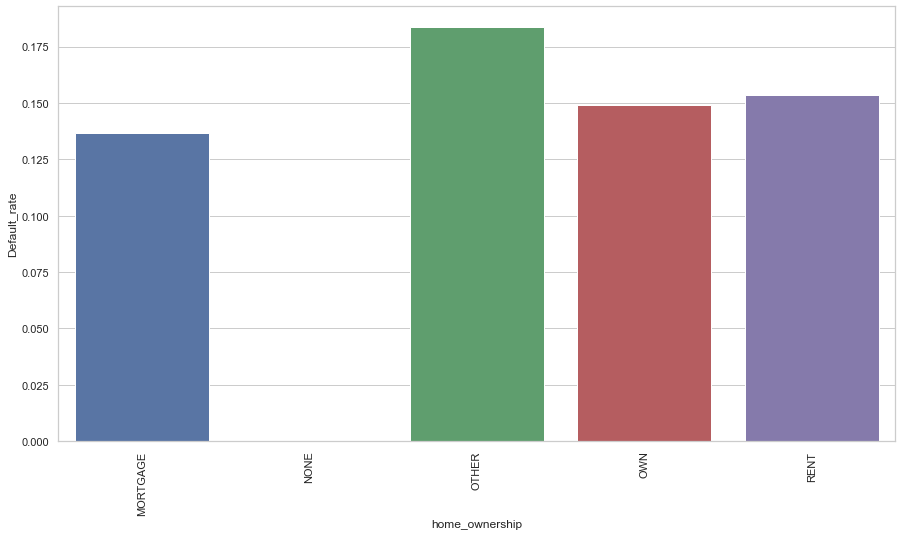

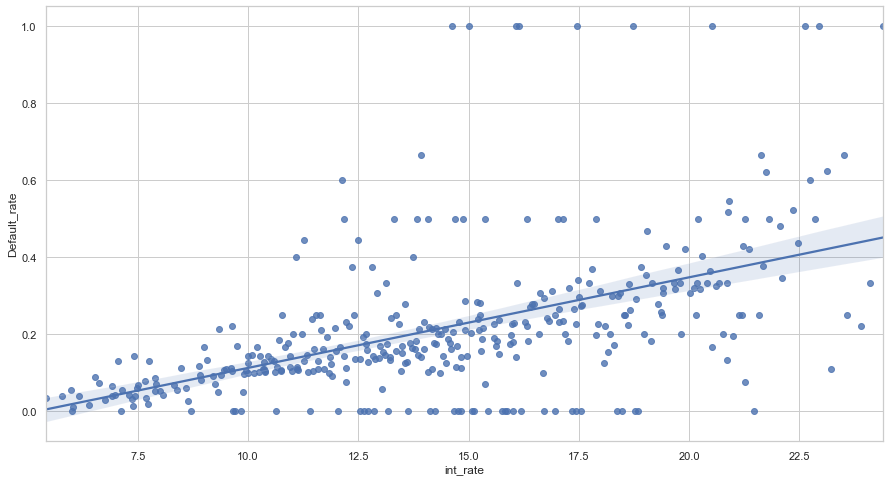

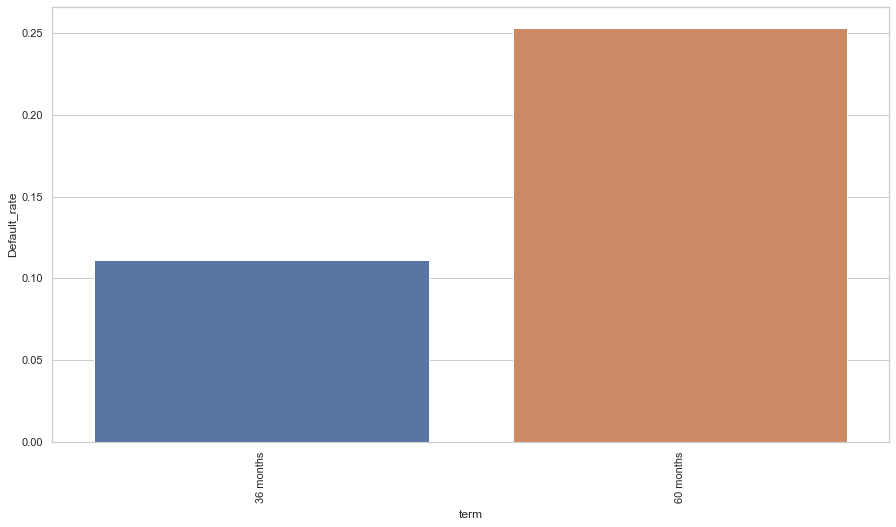

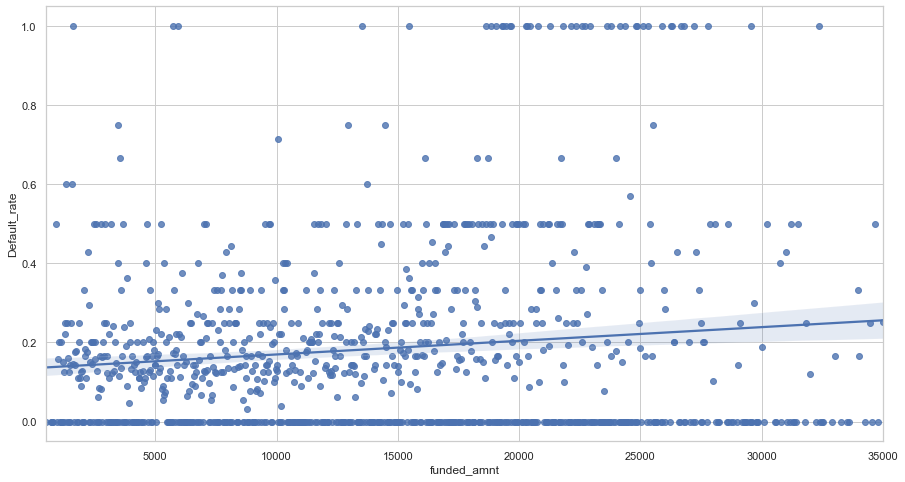

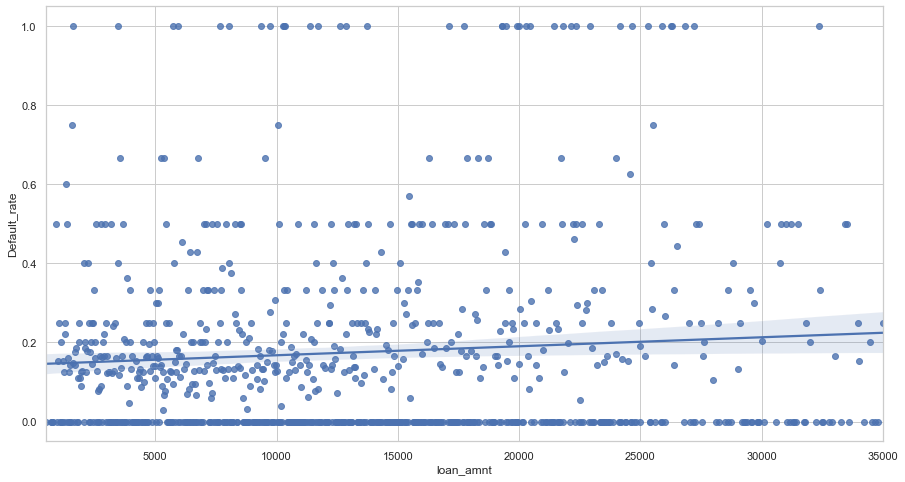

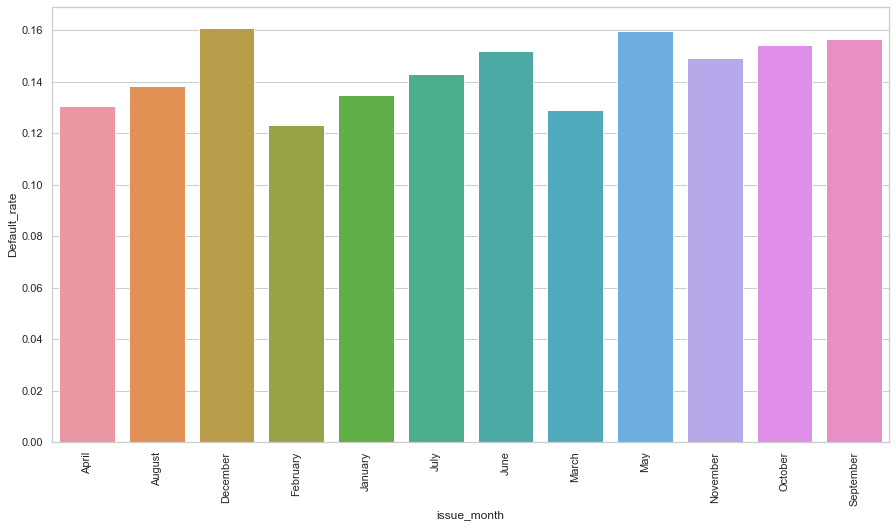

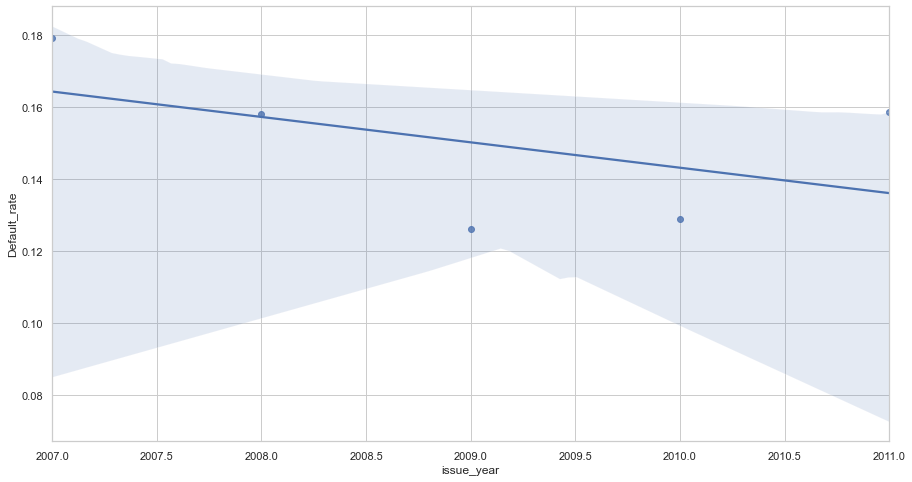

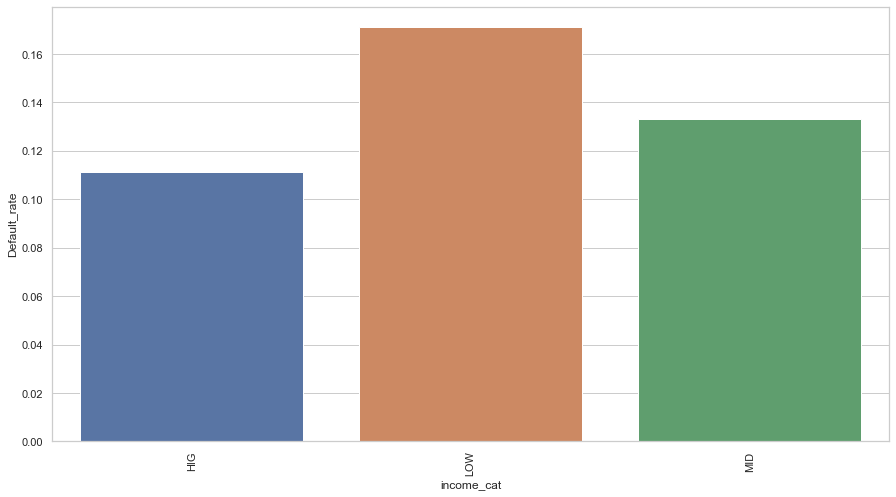

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

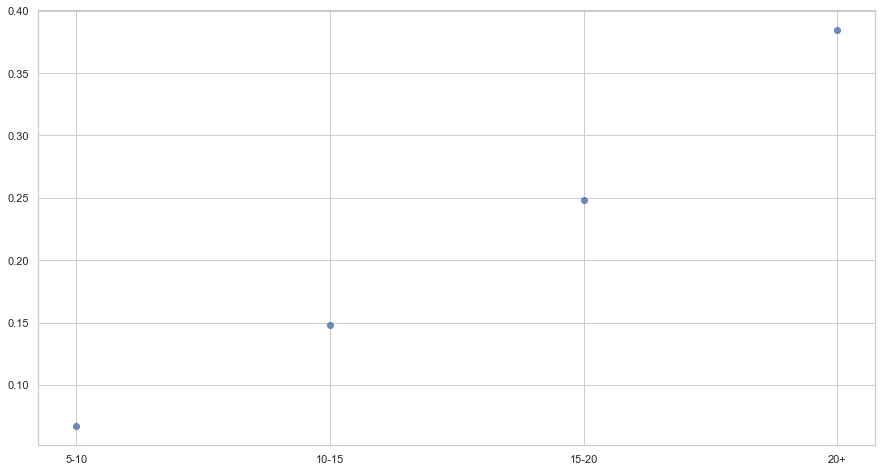

In [161]:
# Cycling through the columns in the dataframe
# remobing the column which are not plottable.
for cl in df.columns:
    if cl in ['issue_d','Default_rate']:
        continue
    Univariate_analysis(cl)

#### We are calculating defaulting rate range for all the variables

In [125]:
def def_rate_by_attr():
    def_rate = []
    loan_column = [cl for cl in df.columns if cl not in ['funded_amnt','loan_amnt','issue_d','Default_rate','annual_inc','int_rate']] 
    for x in loan_column:
        def_rate += [[x,round(max(round(df.groupby([x])['Default_rate'].mean(),2)) - min(round(df.groupby([x])['Default_rate'].mean(),2)),2)]]
    def_rate = sorted(def_rate, key=lambda e: e[1], reverse=True)
    return def_rate

In [221]:
def_rate_by_attr()

[['sub_grade', 0.45],
 ['int_rate_cat', 0.31],
 ['grade', 0.28],
 ['home_ownership', 0.18],
 ['purpose', 0.17],
 ['term', 0.14],
 ['loan_amnt_cat', 0.11],
 ['dti', 0.09],
 ['income_cat', 0.06],
 ['issue_year', 0.05],
 ['verification_status', 0.04],
 ['issue_month', 0.04],
 ['emp_length', 0.03]]

In [206]:
def BiVariate_analysis(coulumns):
    data_df = df.groupby([coulumns[0],coulumns[1]],as_index=False)['Default_rate'].mean()
    plt.figure(figsize=(15,8))
    g = sns.catplot(
    data=data_df, kind="bar",
    x=coulumns[0], y="Default_rate", hue=coulumns[1], height=10)
    #g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()


<Figure size 1080x576 with 0 Axes>

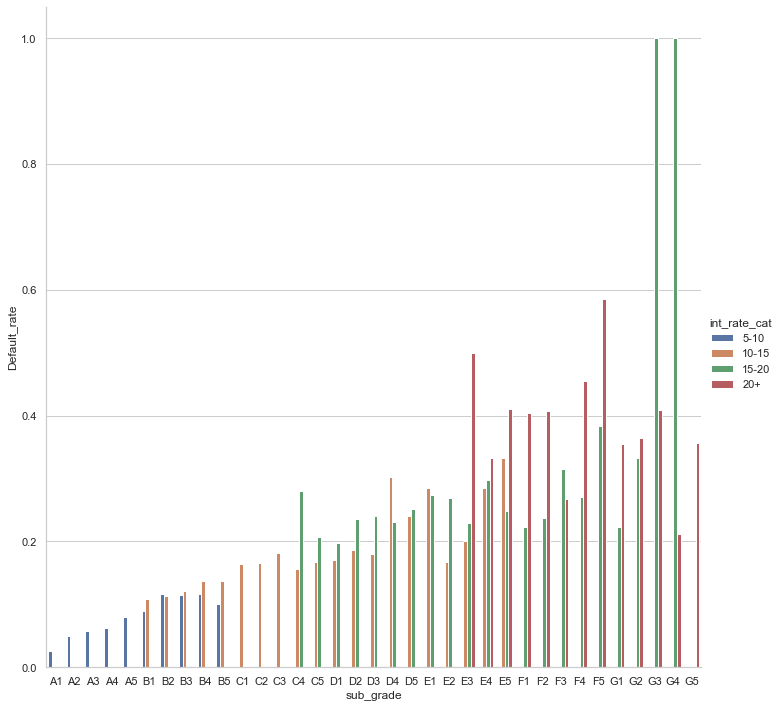

<Figure size 1080x576 with 0 Axes>

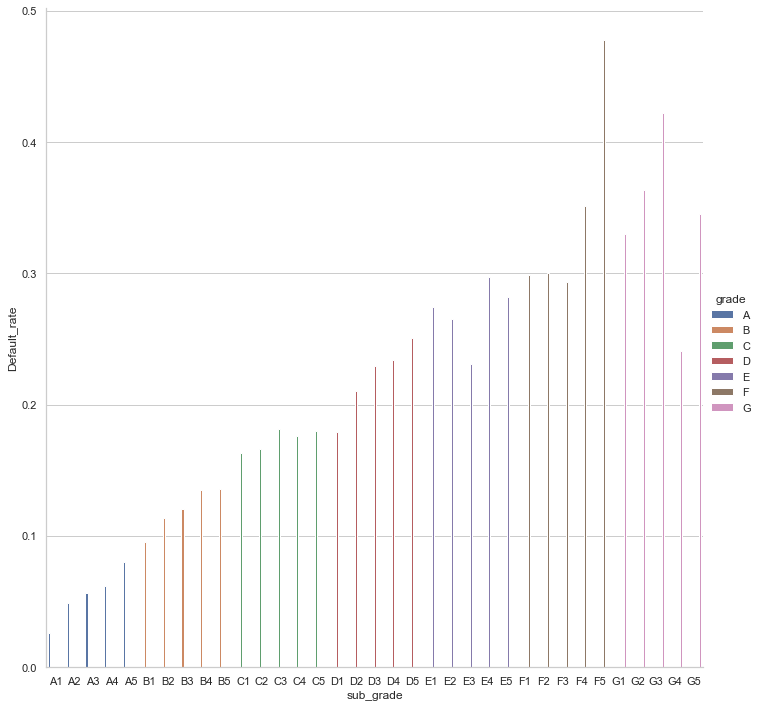

<Figure size 1080x576 with 0 Axes>

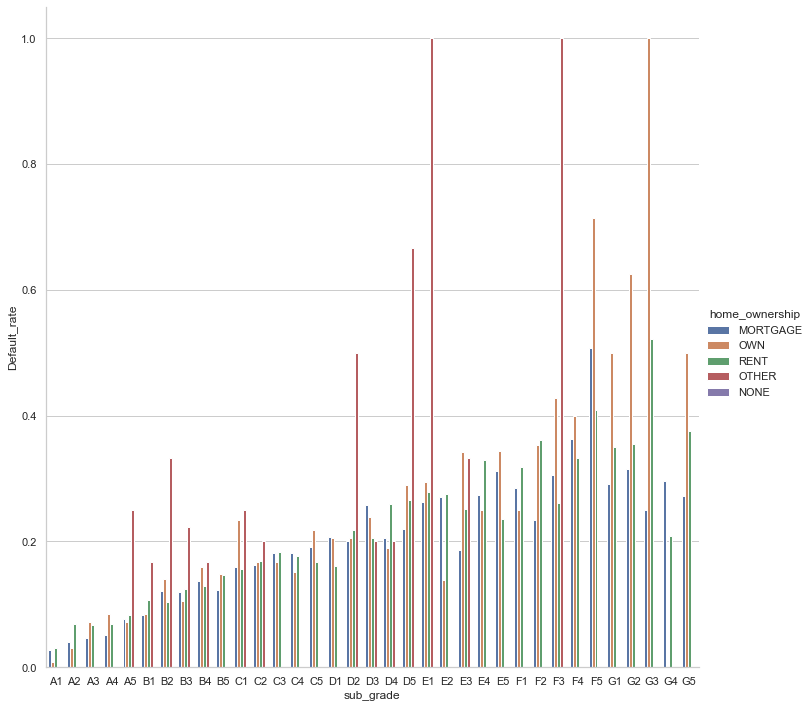

<Figure size 1080x576 with 0 Axes>

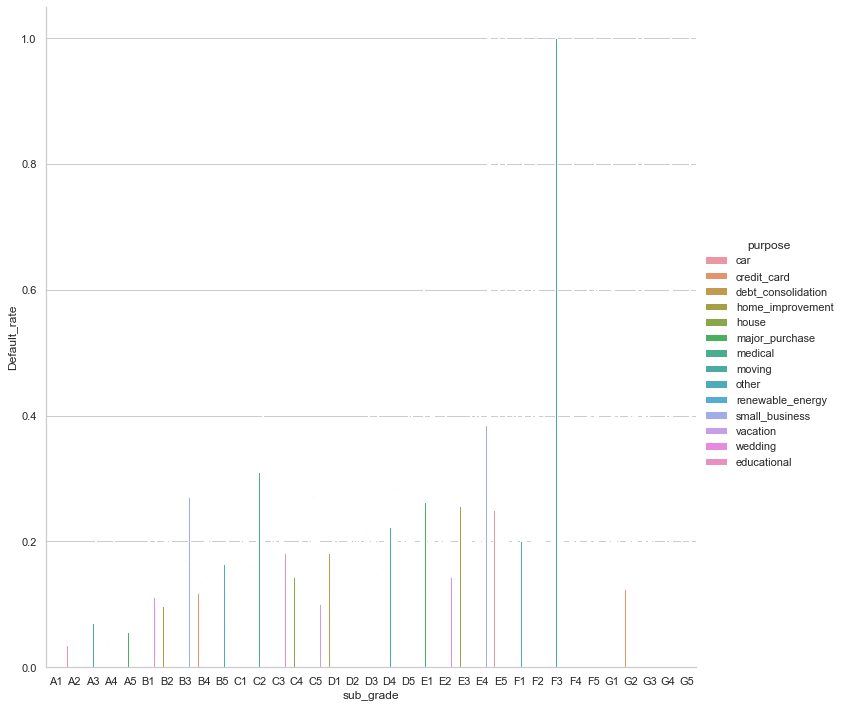

<Figure size 1080x576 with 0 Axes>

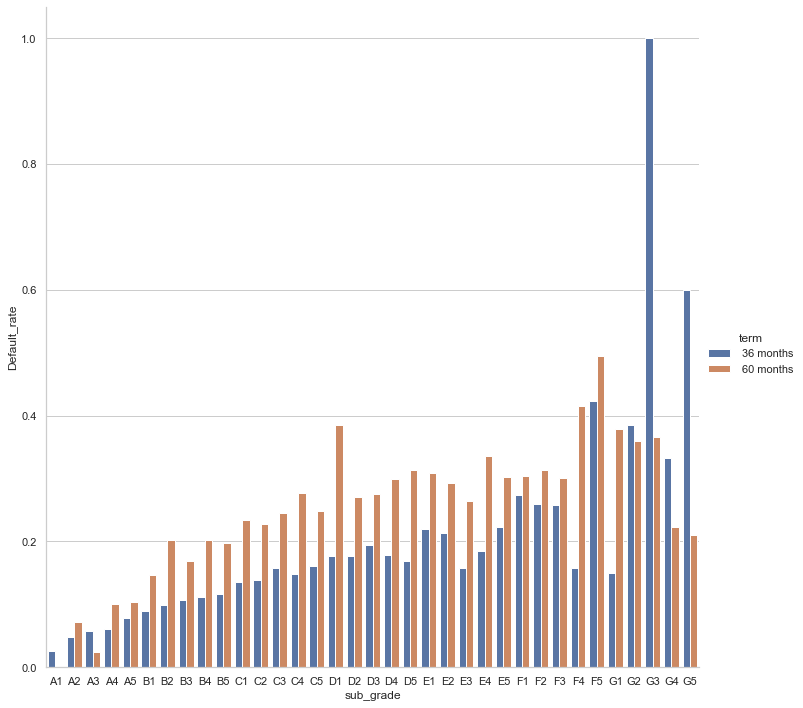

<Figure size 1080x576 with 0 Axes>

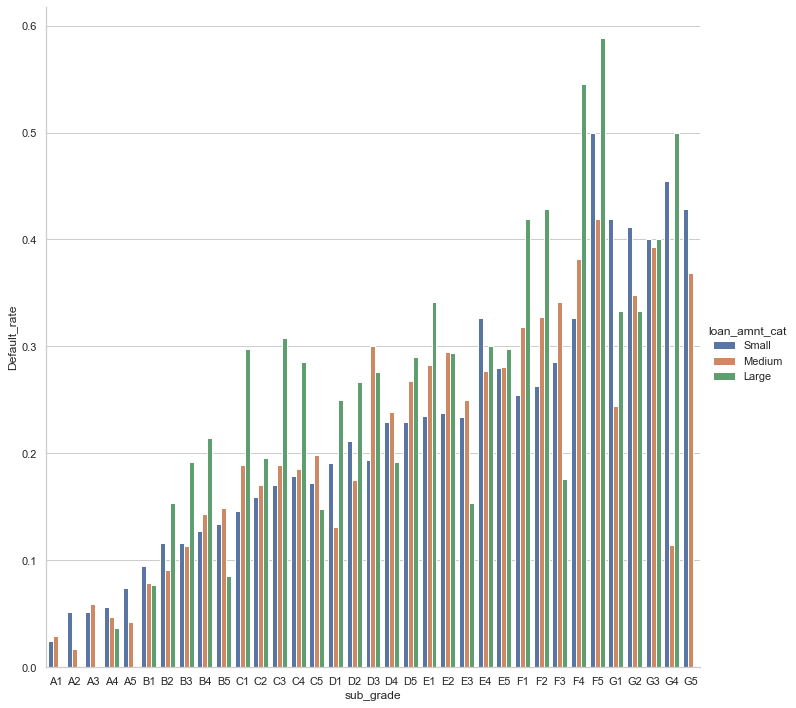

<Figure size 1080x576 with 0 Axes>

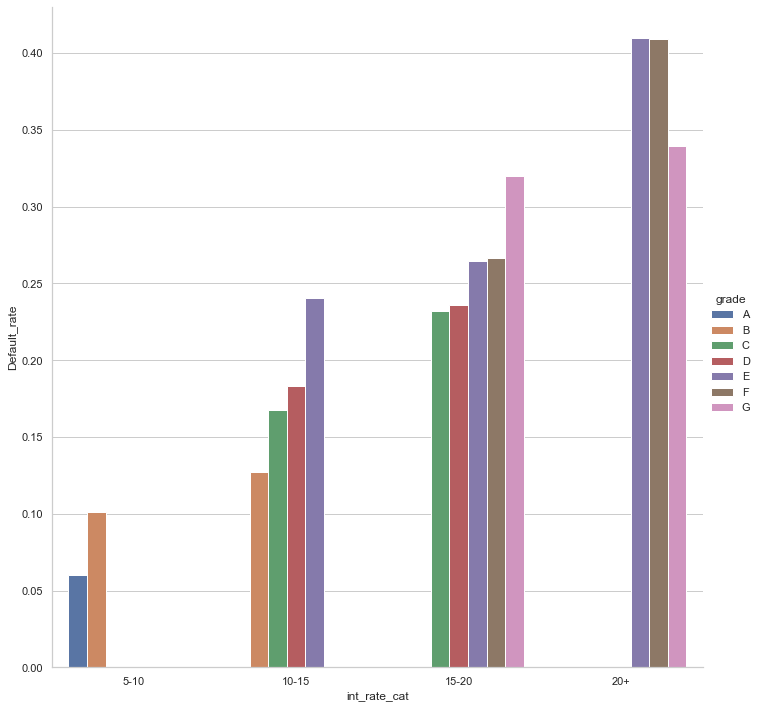

<Figure size 1080x576 with 0 Axes>

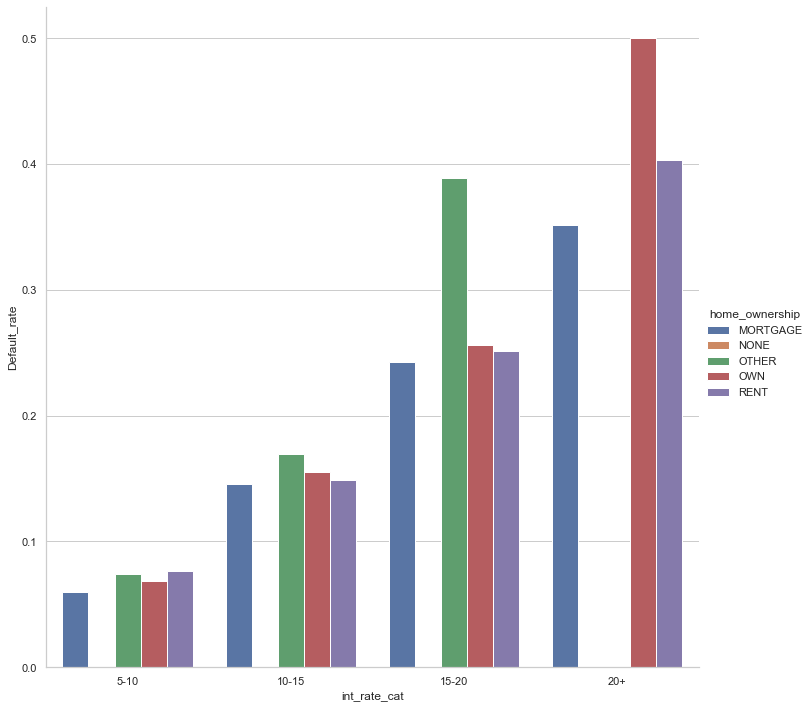

<Figure size 1080x576 with 0 Axes>

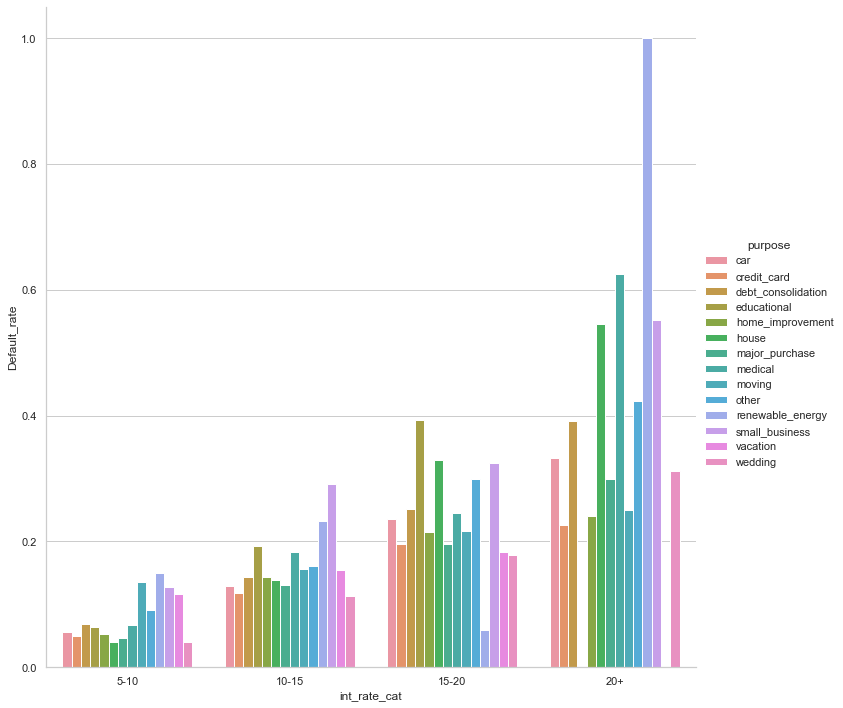

<Figure size 1080x576 with 0 Axes>

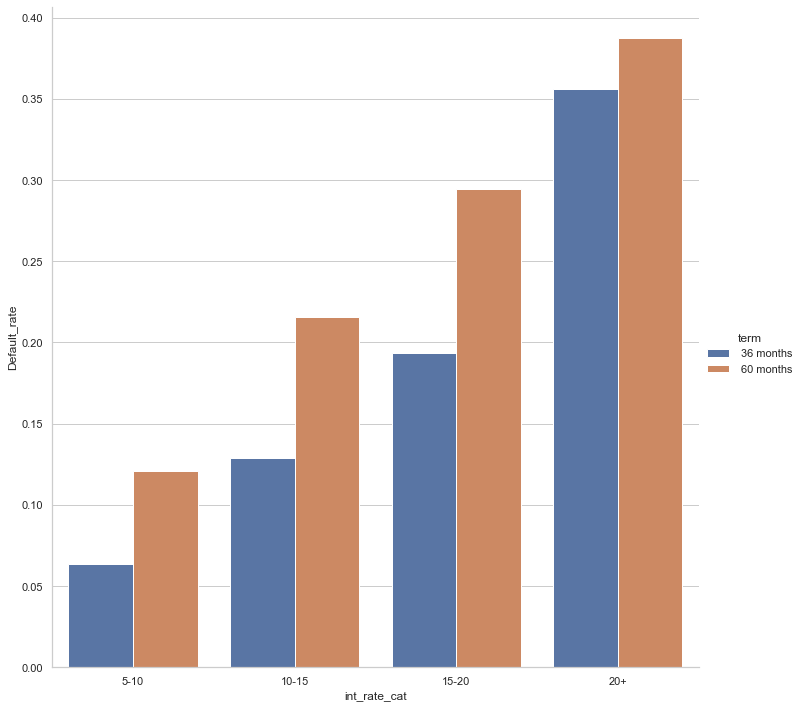

<Figure size 1080x576 with 0 Axes>

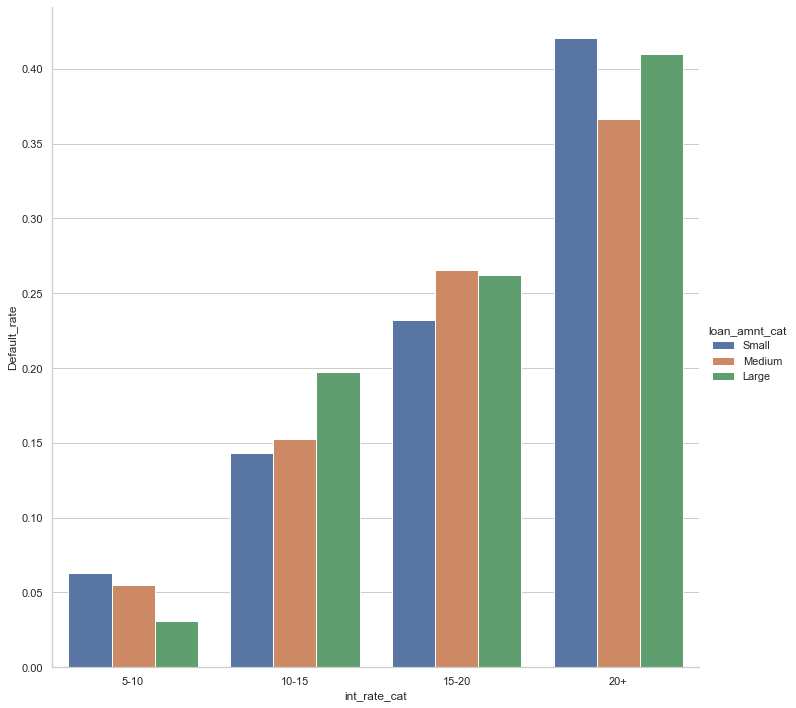

<Figure size 1080x576 with 0 Axes>

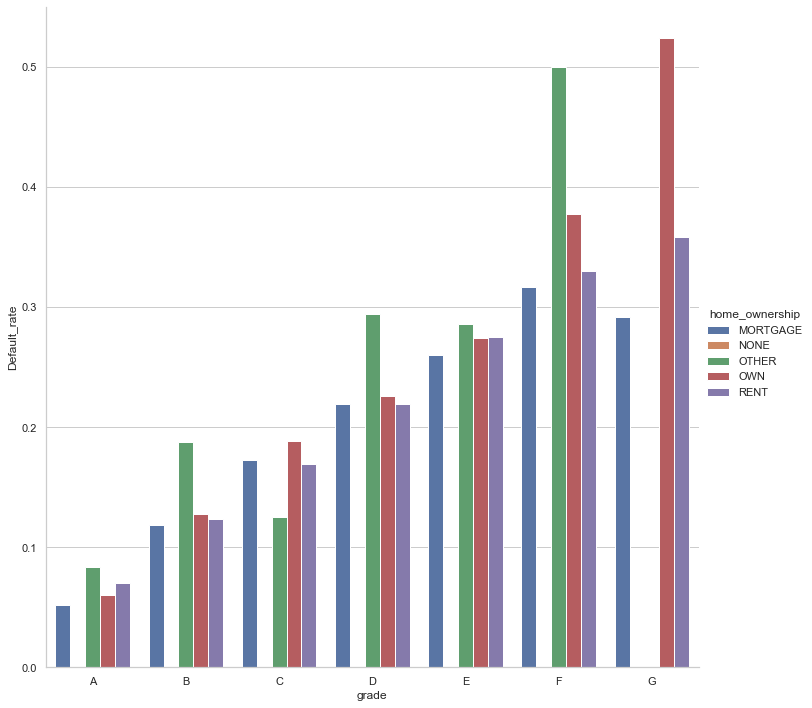

<Figure size 1080x576 with 0 Axes>

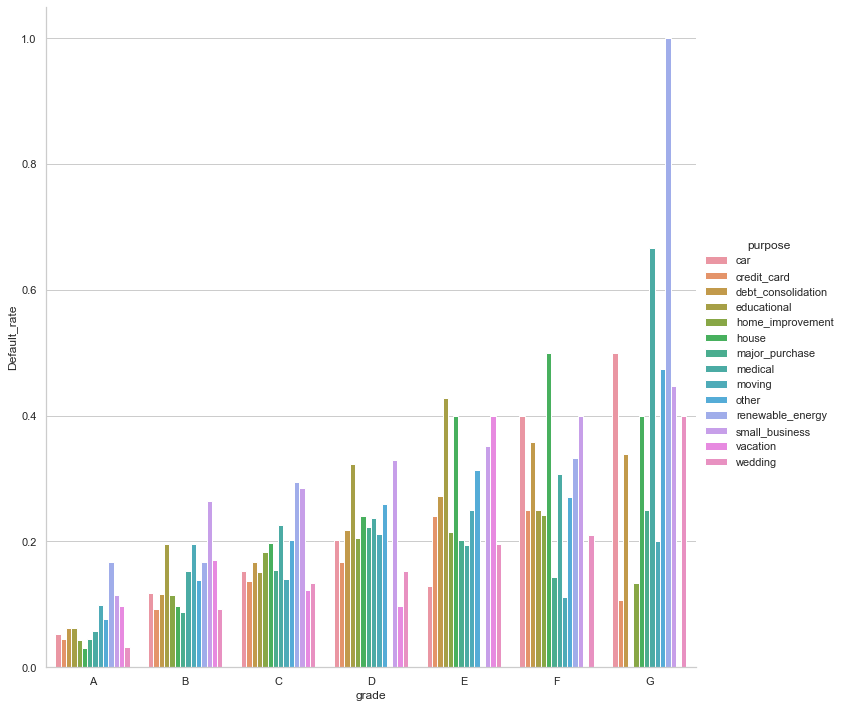

<Figure size 1080x576 with 0 Axes>

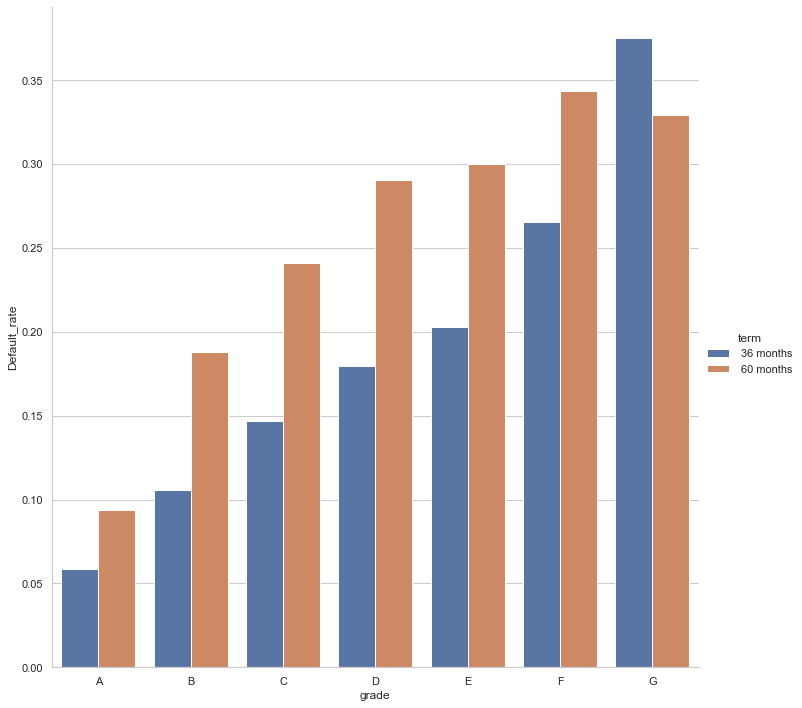

<Figure size 1080x576 with 0 Axes>

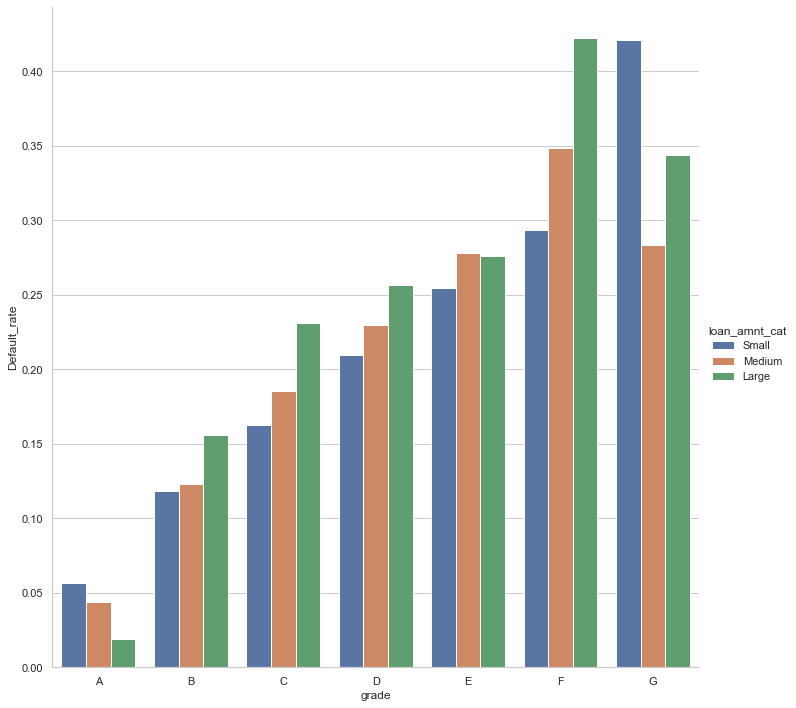

<Figure size 1080x576 with 0 Axes>

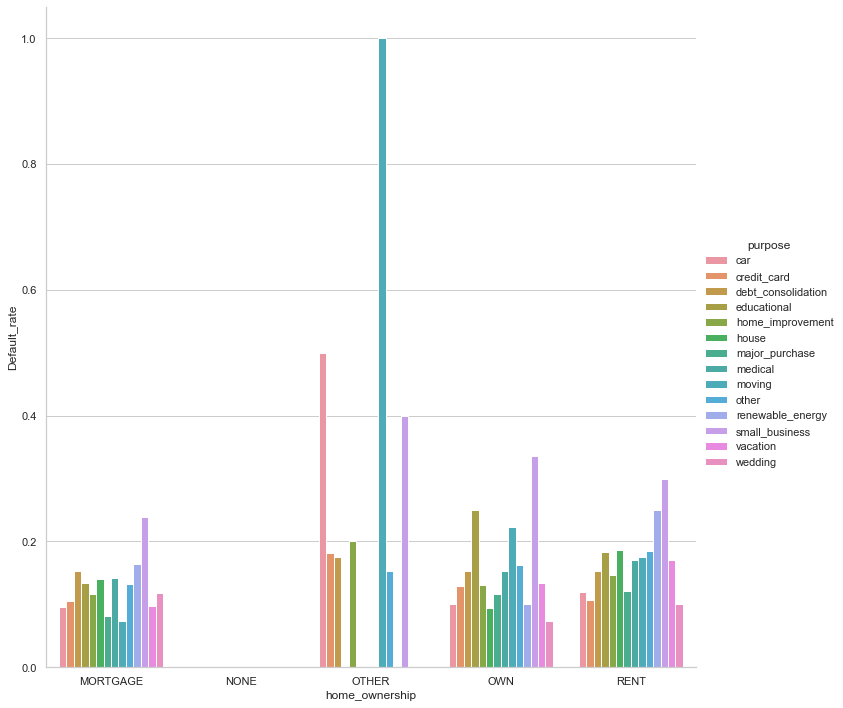

<Figure size 1080x576 with 0 Axes>

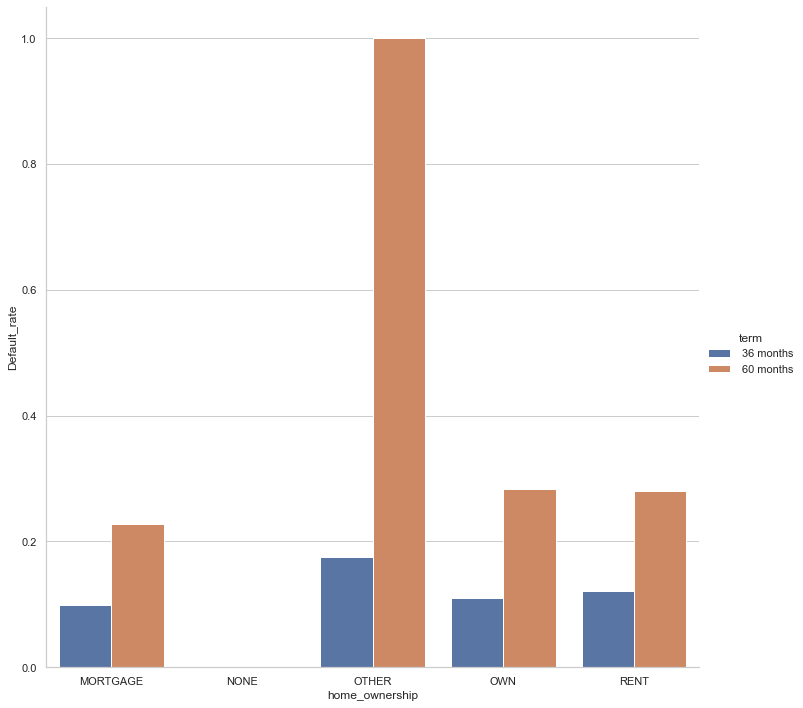

<Figure size 1080x576 with 0 Axes>

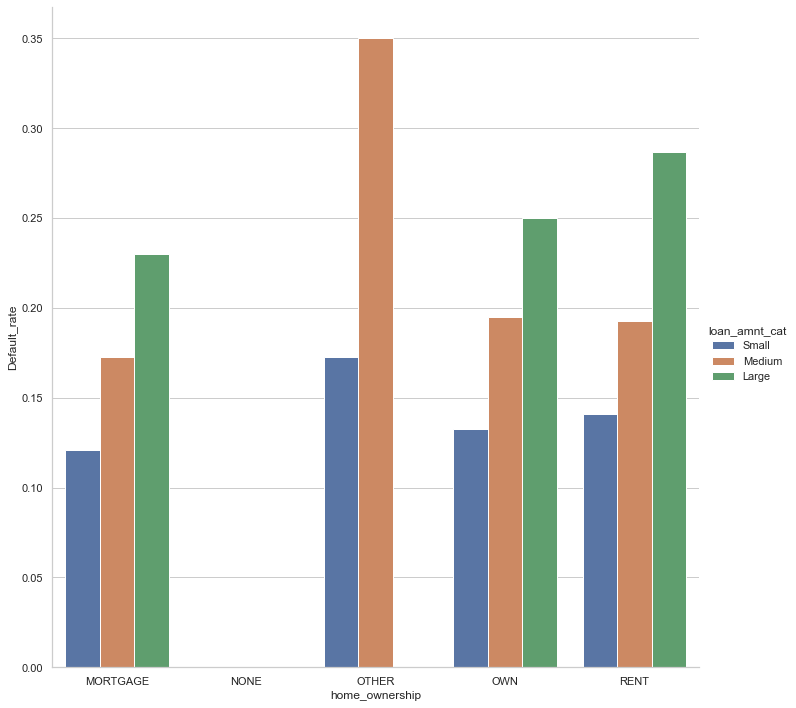

<Figure size 1080x576 with 0 Axes>

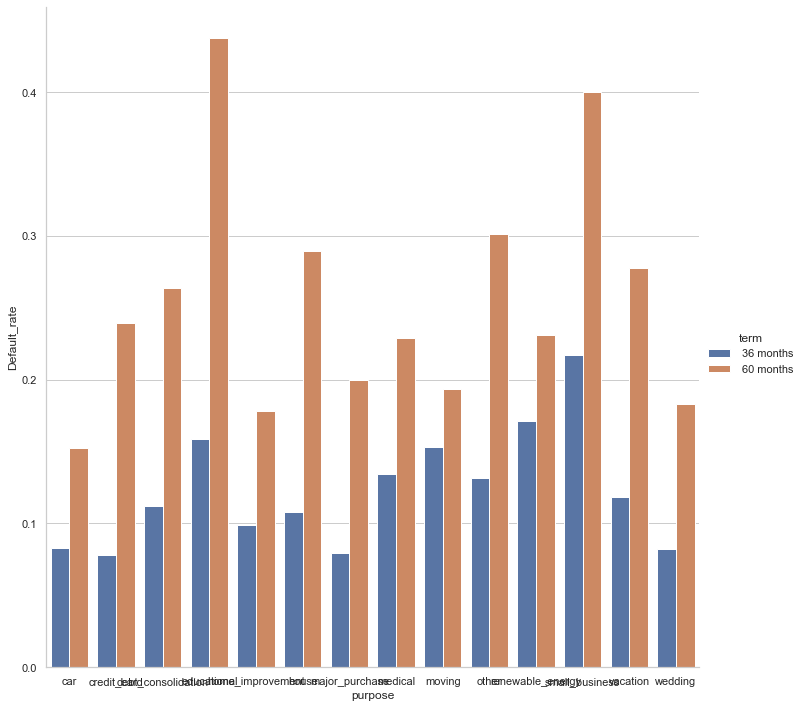

<Figure size 1080x576 with 0 Axes>

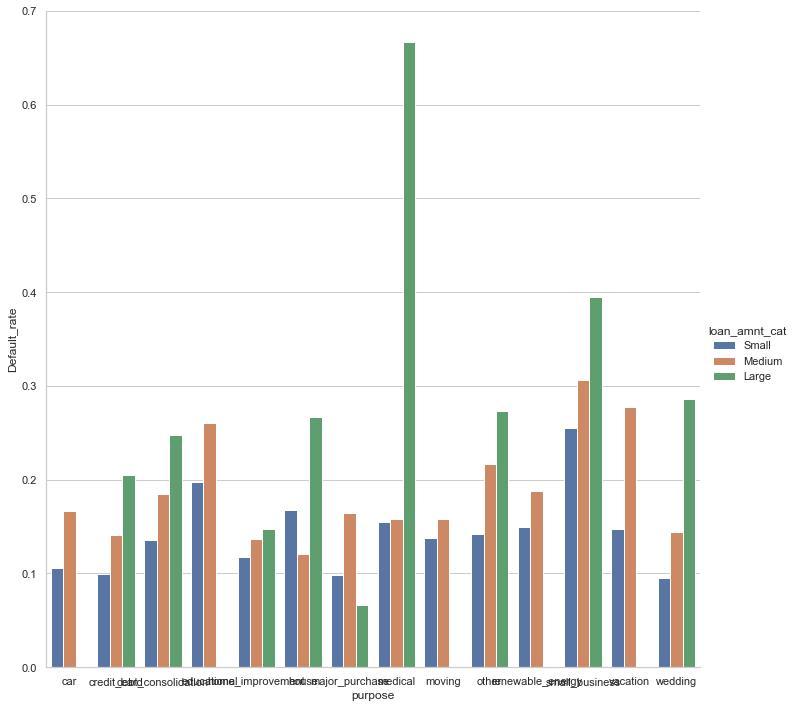

<Figure size 1080x576 with 0 Axes>

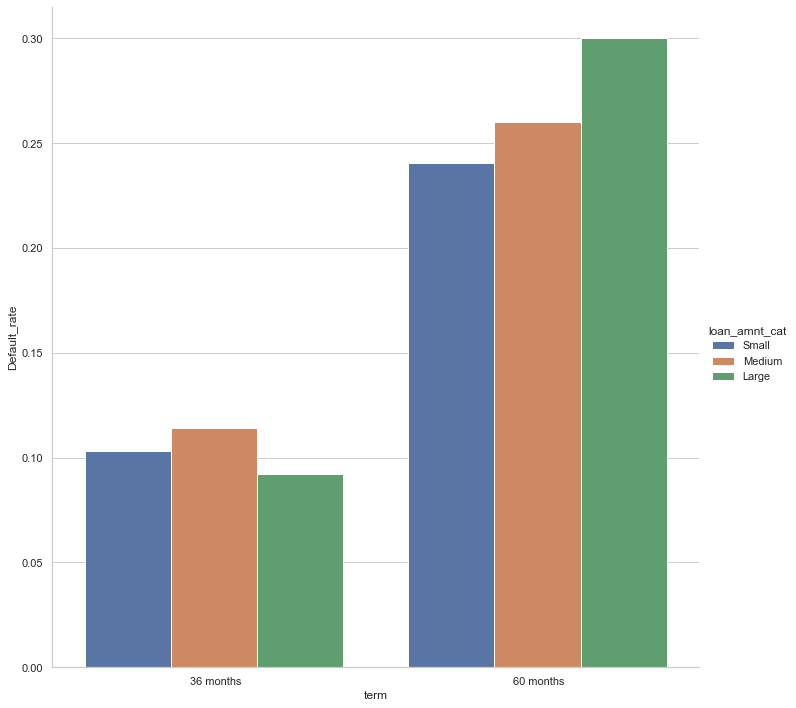

In [222]:
from itertools import combinations 
variables_with_inmportance = ['sub_grade', 'int_rate_cat', 'grade', 'home_ownership', 'purpose', 'term', 'loan_amnt_cat']

combinations = list(combinations(variables_with_inmportance, 2)) 

# combinations = [
#     ('int_rate_cat','grade'),
#     ('home_ownership','grade'),
#     ('grade','purpose'),
#     ('term','grade'),
#     ('emp_length','grade')
# ]

for combination in combinations:
    BiVariate_analysis(combination)



## Conclusion
- After analysis, we found various patterns and insight regarding loan defaults as well as loan and applicant attributes.
- The following are variable, we consider to be driving factors that are leading to load default:
> - Home Ownership status
> - Loan amount
> - Grade and Sub- Grade
> - Interest rate
> - Purpose
> - Loan term